# FTSE 100 stocks data collection and Exploratory Data Analysis

## 1. Introduction

Historical stock market data from Yahoo! Finance will be collected, analysed, transformed and visualised to gain insights into the stock returns for a selection of FTSE 100 companies from 2010-2019, as well as looking at the FTSE 100 Index itself.

## 2. Install/import libraries

In [6]:
!pip install yfinance --upgrade --no-cache-dir
!pip install mplfinance
!pip install seaborn

In [7]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns

import datetime
from datetime import date, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

## 3. Data collection

Download FTSE 100 stock data from Yahoo! Finance using yfinance library and store in a pandas dataframe. The stocks chosen are ULVR.L (Unilever), RSDB.L (Royal Dutch Shell), GSK.L (GlaxoSmithKline), AZN.L (AstraZeneca), HSBA.L (HSBC) and BP.L (BP) representing a selection of different industries - pharmaceuticals, oil and finance.

In [8]:
nifty50_stocks = yf.download("RELIANCE.NS HDFCBANK.NS ITC.NS INFY.NS", start=datetime.datetime(2010, 1, 1), 
                                     end=datetime.datetime(2024, 6, 30), group_by='tickers')
nifty50_stocks.tail(10)

[*********************100%%**********************]  4 of 4 completed


Ticker      HDFCBANK.NS                                                      \
Price              Open         High          Low        Close    Adj Close   
Date                                                                          
2024-06-14  1584.000000  1599.000000  1577.699951  1596.900024  1596.900024   
2024-06-18  1596.900024  1610.500000  1589.449951  1607.800049  1607.800049   
2024-06-19  1613.400024  1669.900024  1604.000000  1657.849976  1657.849976   
2024-06-20  1669.800049  1681.449951  1652.000000  1669.349976  1669.349976   
2024-06-21  1672.849976  1672.849976  1643.150024  1665.750000  1665.750000   
2024-06-24  1647.000000  1675.099976  1645.750000  1672.400024  1672.400024   
2024-06-25  1671.099976  1716.949951  1671.099976  1711.349976  1711.349976   
2024-06-26  1707.949951  1710.900024  1691.099976  1701.500000  1701.500000   
2024-06-27  1696.099976  1713.000000  1686.599976  1696.150024  1696.150024   
2024-06-28  1697.599976  1706.599976  1679.000000  1683.800049  1683.800049   

Ticker                    INFY.NS                                         ...  \
Price         Volume         Open         High          Low        Close  ...   
Date                                                                      ...   
2024-06-14  12770277  1503.699951  1503.699951  1486.050049  1488.900024  ...   
2024-06-18  16207857  1497.000000  1507.000000  1495.400024  1498.199951  ...   
2024-06-19  45065598  1505.000000  1515.650024  1496.699951  1511.349976  ...   
2024-06-20  20704371  1516.300049  1517.500000  1499.099976  1515.400024  ...   
2024-06-21  25815388  1545.000000  1557.750000  1523.699951  1532.699951  ...   
2024-06-24  14272497  1524.550049  1529.099976  1515.400024  1527.150024  ...   
2024-06-25  37260774  1526.000000  1543.900024  1520.349976  1541.949951  ...   
2024-06-26  23798333  1541.000000  1548.849976  1535.000000  1540.699951  ...   
2024-06-27  27537325  1538.449951  1578.400024  1532.050049  1573.349976  ...   
2024-06-28  13238023  1572.550049  1588.500000  1564.250000  1566.750000  ...   

Ticker          ITC.NS                                    RELIANCE.NS  \
Price              Low       Close   Adj Close    Volume         Open   
Date                                                                    
2024-06-14  429.049988  431.149994  431.149994   9217804  2940.000000   
2024-06-18  428.200012  428.750000  428.750000  14098178  2974.699951   
2024-06-19  423.049988  423.649994  423.649994  10909803  2975.000000   
2024-06-20  421.500000  423.299988  423.299988  14585806  2918.000000   
2024-06-21  418.549988  419.600006  419.600006  25205627  2947.250000   
2024-06-24  420.000000  423.299988  423.299988   9362433  2891.050049   
2024-06-25  419.750000  423.299988  423.299988  10260449  2886.000000   
2024-06-26  422.049988  423.950012  423.950012  11084805  2892.100098   
2024-06-27  421.100006  425.600006  425.600006  37012589  3027.500000   
2024-06-28  423.500000  424.899994  424.899994  17866326  3062.050049   

Ticker                                                                    
Price              High          Low        Close    Adj Close    Volume  
Date                                                                      
2024-06-14  2959.350098  2914.449951  2955.100098  2955.100098   4078999  
2024-06-18  2974.800049  2942.699951  2962.050049  2962.050049   3598383  
2024-06-19  2975.000000  2912.000000  2917.300049  2917.300049   4362937  
2024-06-20  2965.699951  2900.199951  2947.399902  2947.399902   8056888  
2024-06-21  2949.399902  2881.149902  2908.399902  2908.399902  15585180  
2024-06-24  2899.000000  2875.000000  2882.949951  2882.949951   4439193  
2024-06-25  2911.850098  2882.000000  2908.300049  2908.300049   3522693  
2024-06-26  3037.949951  2890.250000  3028.050049  3028.050049  11007441  
2024-06-27  3075.000000  3012.000000  3061.100098  3061.100098  14191515  
2024-06-28  3162.000000  3062.050049  3130.800049  3130.800049  1447

## 4. Exploratory Data Analysis

In [9]:
# Descriptive statistics showing distribution of the data

nifty50_stocks.describe()

Ticker  HDFCBANK.NS                                                      \
Price          Open         High          Low        Close    Adj Close   
count   3574.000000  3574.000000  3574.000000  3574.000000  3574.000000   
mean     826.753096   834.295985   818.688294   826.656419   789.910101   
std      501.778778   505.925293   497.477966   501.661240   495.609087   
min      156.679993   157.789993   154.899994   156.740005   139.597687   
25%      332.625000   336.181244   328.481255   332.581261   304.426208   
50%      717.100006   722.200012   713.387512   718.225006   674.876587   
75%     1302.062469  1316.700012  1288.350037  1303.762512  1267.634033   
max     1723.449951  1757.500000  1713.800049  1728.199951  1711.349976   

Ticker                    INFY.NS                                         ...  \
Price         Volume         Open         High          Low        Close  ...   
count   3.574000e+03  3574.000000  3574.000000  3574.000000  3574.000000  ...   
mean    7.592223e+06   755.065111   762.587800   747.297948   754.940454  ...   
std     7.639191e+06   465.992477   469.917290   461.651948   465.787043  ...   
min     0.000000e+00   270.000000   270.500000   257.568756   265.475006  ...   
25%     3.400348e+06   390.484375   395.518761   385.139069   390.706253  ...   
50%     5.577602e+06   550.712494   557.887512   544.399994   551.487518  ...   
75%     9.089828e+06  1128.399994  1140.187500  1112.512512  1126.312469  ...   
max     2.011300e+08  1938.550049  1953.900024  1930.500000  1939.500000  ...   

Ticker       ITC.NS                                          RELIANCE.NS  \
Price           Low        Close    Adj Close        Volume         Open   
count   3574.000000  3574.000000  3574.000000  3.574000e+03  3574.000000   
mean     235.107788   237.572407   197.085969  1.408912e+07  1070.214050   
std       85.150330    85.683034    90.913874  1.180077e+07   805.449712   
min       76.266663    77.416664    54.075375  0.000000e+00   308.587280   
25%      192.550003   194.825001   149.884933  7.769952e+06   427.804855   
50%      226.233330   228.683334   182.608513  1.057842e+07   598.430756   
75%      270.587502   273.337502   220.443085  1.603674e+07  1841.580505   
max      487.000000   492.149994   476.573608  1.494797e+08  3062.050049   

Ticker                                                                    
Price          High          Low        Close    Adj Close        Volume  
count   3574.000000  3574.000000  3574.000000  3574.000000  3.574000e+03  
mean    1081.549924  1058.266360  1069.461055  1047.233579  9.027680e+06  
std      813.098719   797.515404   805.217380   813.010357  6.226508e+06  
min      312.153198   307.695831   309.090179   281.488586  0.000000e+00  
25%      431.987930   421.895966   426.661942   396.029861  5.517350e+06  
50%      605.048218   592.624725   596.670654   576.211792  7.436193e+06  
75%     1858.321381  1824.539612  1838.926880  1820.148987  1.039136e+07  
max     3162.000000  3062.050049  3130.800049  3130.800049  9.432482e+07  

[8 rows x 24 columns]

In [10]:
# Concise summary of the dataframe to check for missing values and data types

nifty50_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3574 entries, 2010-01-04 to 2024-06-28
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (HDFCBANK.NS, Open)       3574 non-null   float64
 1   (HDFCBANK.NS, High)       3574 non-null   float64
 2   (HDFCBANK.NS, Low)        3574 non-null   float64
 3   (HDFCBANK.NS, Close)      3574 non-null   float64
 4   (HDFCBANK.NS, Adj Close)  3574 non-null   float64
 5   (HDFCBANK.NS, Volume)     3574 non-null   int64  
 6   (INFY.NS, Open)           3574 non-null   float64
 7   (INFY.NS, High)           3574 non-null   float64
 8   (INFY.NS, Low)            3574 non-null   float64
 9   (INFY.NS, Close)          3574 non-null   float64
 10  (INFY.NS, Adj Close)      3574 non-null   float64
 11  (INFY.NS, Volume)         3574 non-null   int64  
 12  (ITC.NS, Open)            3574 non-null   float64
 13  (ITC.NS, High)            3574 non-null   flo

In [11]:
# Number of rows indicates number of trading days

nifty50_stocks.shape

(3574, 24)

We will use the Adjusted Close price to take into account all corporate actions, such as stock splits and dividends, to give a more accurate reflection of the true value of the stock and present a coherent picture of returns.

In [12]:
# Dataframe to contain Adjusted Close price for each company's stock

adj_close = pd.DataFrame()

In [13]:
tickers = ['RELIANCE.NS', 'HDFCBANK.NS', 'ITC.NS', 'INFY.NS']
for ticker in tickers:
    adj_close[ticker] = nifty50_stocks[ticker]['Adj Close']

adj_close

,RELIANCE.NS,HDFCBANK.NS,ITC.NS,INFY.NS
Date,,,,
2010-01-04,440.421967,151.915085,59.057995,239.087799
2010-01-05,438.456360,152.048676,59.640083,239.888565
2010-01-06,445.540833,152.151138,59.779785,236.388153
2010-01-07,452.932312,152.547424,59.593513,231.075836
2010-01-08,451.744781,152.747818,59.721565,225.507172
...,...,...,...,...
2024-06-24,2882.949951,1672.400024,423.299988,1527.150024
2024-06-25,2908.300049,1711.349976,423.299988,1541.949951
2024-06-26,3028.050049,1701.500000,423.950012,1540.699951


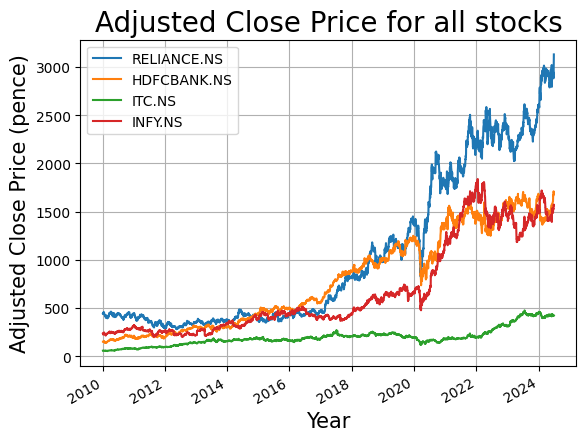

In [14]:
# Plot Adjusted Close price for all stocks

adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price (pence)', color = 'black', fontsize = 15);

This chart shows the absolute price rather than relative change which we are more concerned with when trading. AZN.L and ULVR.L stocks are far more expensive than BP.L and HSBA.L making the latter appear much less volatile than they truly are. 

In [15]:
# lambda function to calculate min and max Adjusted Close price 

adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), x.max()], 
                              index=['min', 'max']))

adj_close_min_max

,RELIANCE.NS,HDFCBANK.NS,ITC.NS,INFY.NS
min,281.488586,139.597687,54.075375,200.857986
max,3130.800049,1711.349976,476.573608,1838.948975


One solution would be to use two different scales when plotting the data. One scale will be used by the BP.L and HSBA.L stocks, and the other by the more expensive stocks.

## 5. Data transformation

A better solution would be to plot the stocks' returns, which requires transforming the data into something more useful for our purposes.




### 5.1 Consider stocks' returns since beginning of the time period

One transformation is to plot $return_{t,0}$  = $\frac{price_t}{price_0}$ by applying a lambda function to each column in the adj_close dataframe and return a dataframe with the result.

In [16]:
# Transform data using lambda function to plot stocks' returns

returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()

,RELIANCE.NS,HDFCBANK.NS,ITC.NS,INFY.NS
Date,,,,
2010-01-04,1.000000,1.000000,1.000000,1.000000
2010-01-05,0.995537,1.000879,1.009856,1.003349
2010-01-06,1.011623,1.001554,1.012222,0.988709
2010-01-07,1.028405,1.004162,1.009068,0.966489
2010-01-08,1.025709,1.005482,1.011236,0.943198


Plot $return_{t,0}$  = $\frac{price_t}{price_0}$ with transformed data

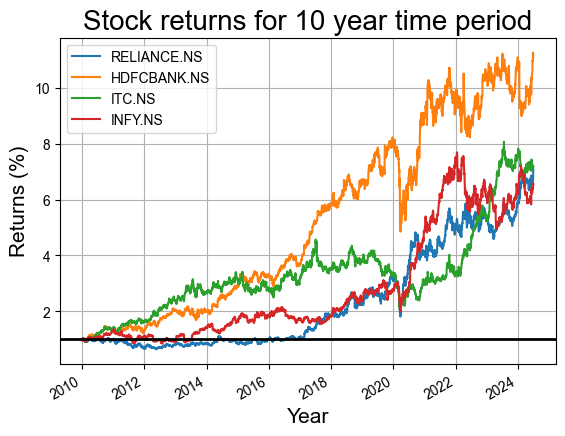

In [17]:
# Plot to show how profitable each stock was throughout the time period

returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

This plot is more useful than the previous one as we can see how profitable each stock was since the beginning of the period and which are most closely correlated. The overall trend of the stocks is much more apparent.

In [18]:
# Create dataframe to contain returns for each company's stock to plot the change of each stock per day

returns = pd.DataFrame()

### 5.2 Percentage change

Another transformation is to calculate the daily percentage change directly using the pandas **'pct_change()'** method which computes the percentage change from the previous row by default.

This can be represented with the formula $increase_{t}$  = $\frac{price_t - price_{t-1}}{price_t}$ 





In [19]:
# pandas pct_change() method on the Adj Close column to create a column representing return value

tickers = ['RELIANCE.NS', 'HDFCBANK.NS', 'ITC.NS', 'INFY.NS']
for ticker in tickers:
    returns[ticker] = nifty50_stocks[ticker]['Adj Close'].pct_change() * 100

returns

,RELIANCE.NS,HDFCBANK.NS,ITC.NS,INFY.NS
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,-0.446301,0.087938,0.985622,0.334925
2010-01-06,1.615776,0.067388,0.234242,-1.459183
2010-01-07,1.658990,0.260456,-0.311596,-2.247286
2010-01-08,-0.262187,0.131365,0.214875,-2.409886
...,...,...,...,...
2024-06-24,-0.875050,0.399221,0.881788,-0.362101
2024-06-25,0.879311,2.328985,0.000000,0.969121
2024-06-26,4.117526,-0.575568,0.153561,-0.081066


In [20]:
# Clean up the data by dropping the first value which becomes a 'NaN' as there is no price change from the day before.

returns.dropna(inplace=True)
returns.head()

,RELIANCE.NS,HDFCBANK.NS,ITC.NS,INFY.NS
Date,,,,
2010-01-05,-0.446301,0.087938,0.985622,0.334925
2010-01-06,1.615776,0.067388,0.234242,-1.459183
2010-01-07,1.658990,0.260456,-0.311596,-2.247286
2010-01-08,-0.262187,0.131365,0.214875,-2.409886
2010-01-11,-1.962565,-0.402298,0.039002,1.032815


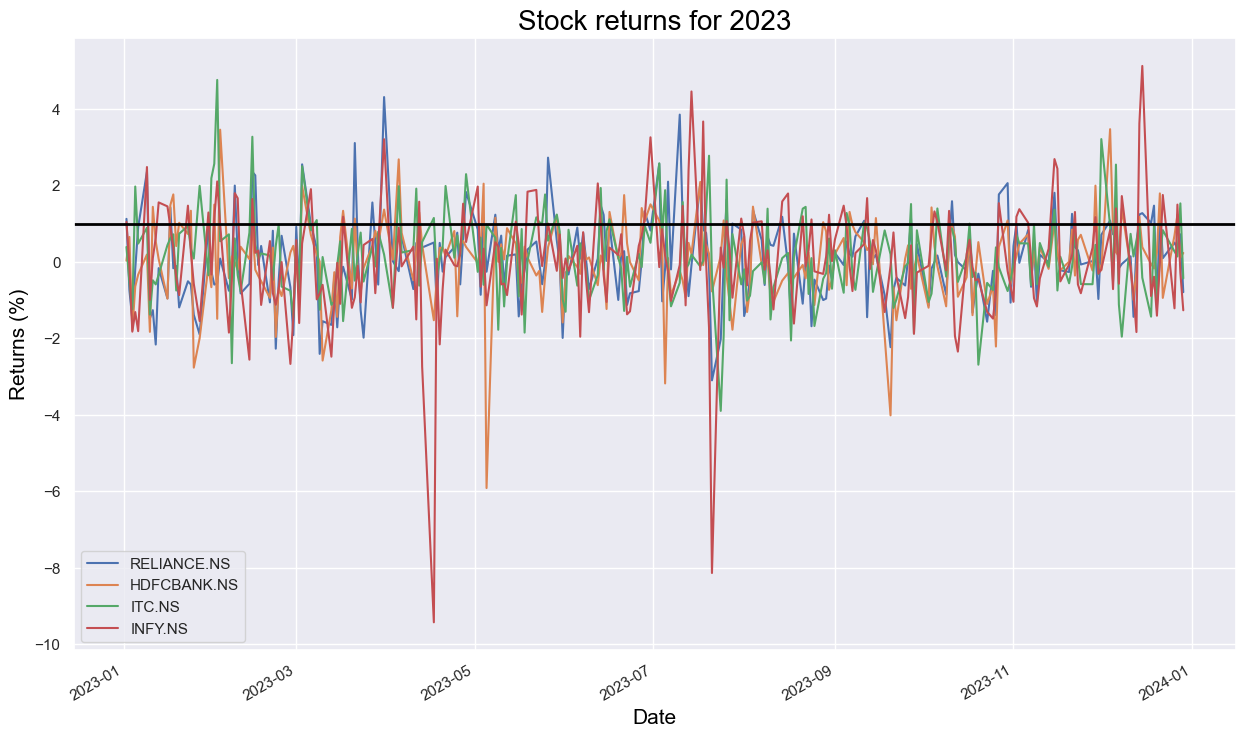

In [21]:
# Plot returns for 2023

returns.loc['2023-01-01':'2023-12-31'].plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 2023', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

The above plot for 2019 shows changes between days, which is what more advanced methods consider when modelling stock behaviour.

In [22]:
# Use numpy's log function to obtain and plot the log differences of the adjusted price data

stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

stock_change.head()

,RELIANCE.NS,HDFCBANK.NS,ITC.NS,INFY.NS
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,-0.004473,0.000879,0.009808,0.003344
2010-01-06,0.016029,0.000674,0.002340,-0.014699
2010-01-07,0.016454,0.002601,-0.003121,-0.022729
2010-01-08,-0.002625,0.001313,0.002146,-0.024394


In [23]:
# Clean up the data by dropping NaNs

stock_change.dropna(inplace=True)
stock_change.head()

,RELIANCE.NS,HDFCBANK.NS,ITC.NS,INFY.NS
Date,,,,
2010-01-05,-0.004473,0.000879,0.009808,0.003344
2010-01-06,0.016029,0.000674,0.002340,-0.014699
2010-01-07,0.016454,0.002601,-0.003121,-0.022729
2010-01-08,-0.002625,0.001313,0.002146,-0.024394
2010-01-11,-0.019821,-0.004031,0.000390,0.010275


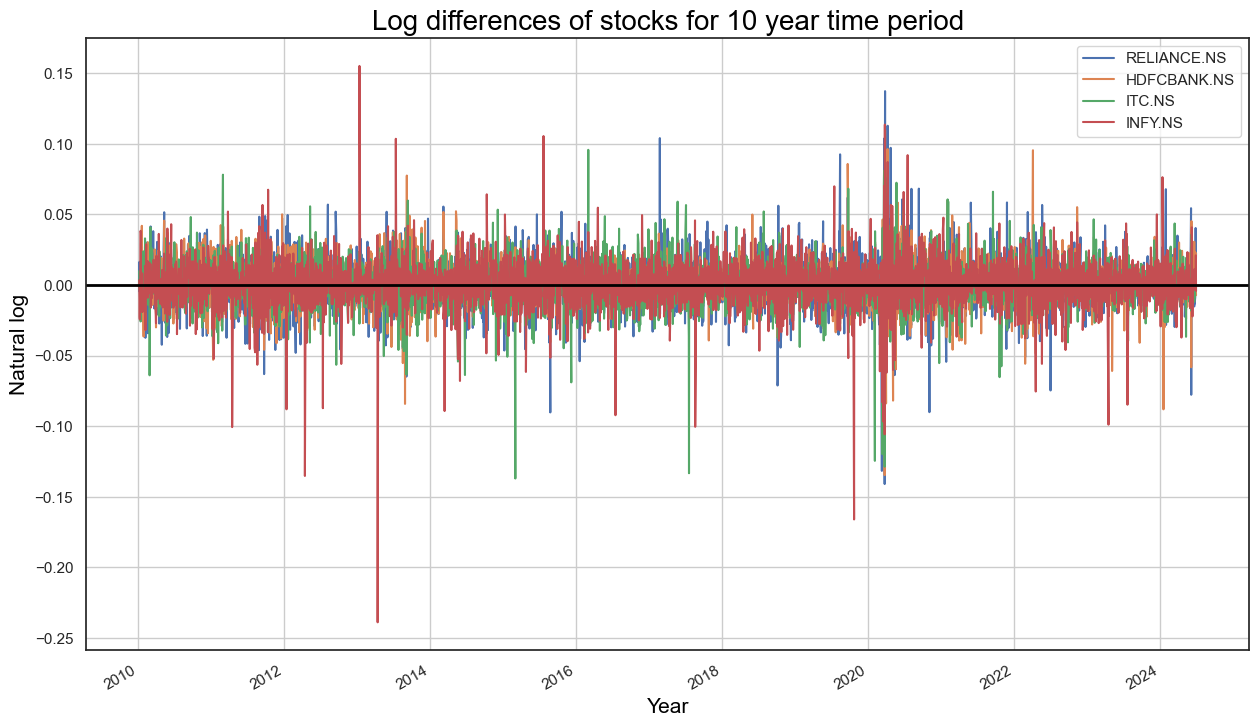

In [37]:
# Plot log differences for 2010-2019

stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

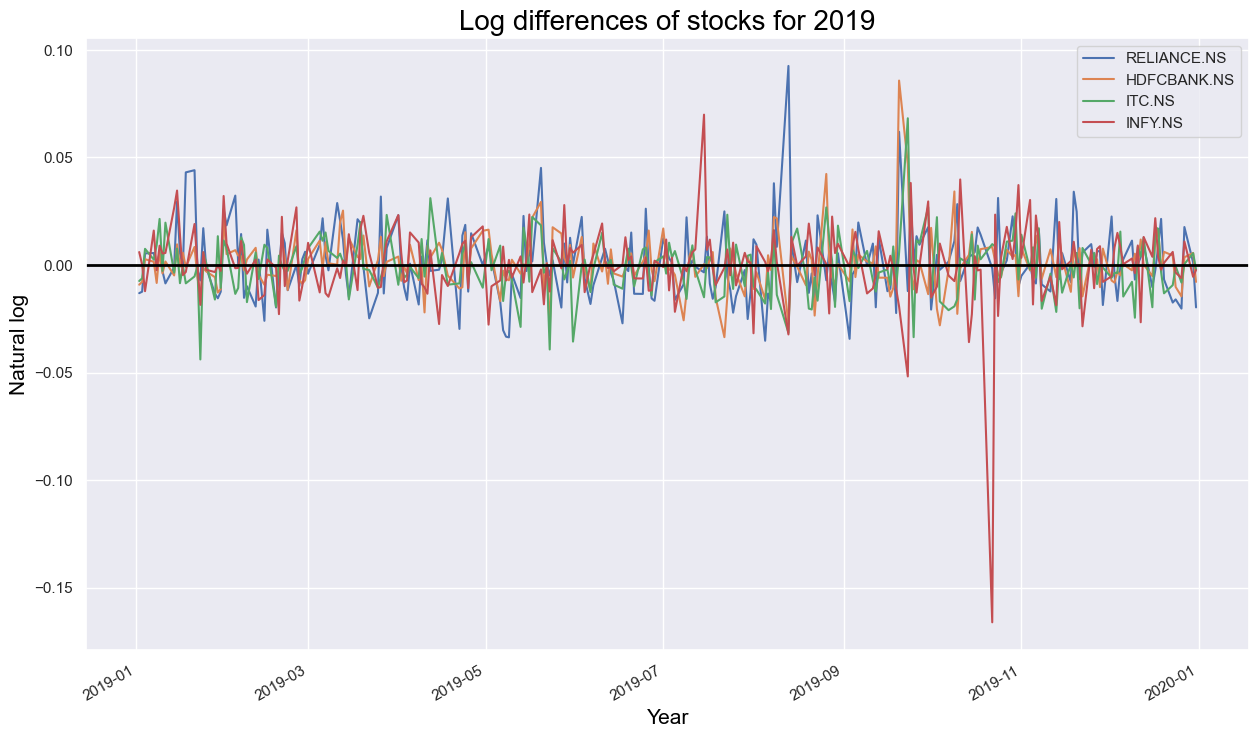

In [25]:
# Plot log differences for 2019

stock_change.loc['2019-01-01':'2019-12-31'][1:].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
# sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 2019', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

### 5.4 Annualise returns

We can annualise our returns, thus computing the annual percentage rate (APR). This helps us keep returns on a common time scale.

In [26]:
# annualise returns

stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr

,RELIANCE.NS,HDFCBANK.NS,ITC.NS,INFY.NS
Date,,,,
2010-01-05,-112.719519,22.150574,247.160649,84.260199
2010-01-06,403.921041,16.976091,58.959838,-370.423189
2010-01-07,414.635622,65.549460,-78.644888,-572.776308
2010-01-08,-66.157940,33.082215,54.090490,-614.728551
2010-01-11,-499.483847,-101.583656,9.826561,258.934419
...,...,...,...,...
2024-06-24,-221.483044,100.403418,221.236536,-91.415140
2024-06-25,220.617843,580.174141,0.000000,243.042617
2024-06-26,1016.823258,-145.462048,38.667733,-20.436963


## 6. Calculating statistical data for returns

### 6.1 Calculate minimum and maximum returns for 2010-2019

In [27]:
# Date of worst single day returns

returns.idxmin()

RELIANCE.NS   2020-03-23
HDFCBANK.NS   2020-03-23
ITC.NS        2015-03-02
INFY.NS       2013-04-12
dtype: datetime64[ns]

In [28]:
# Date of best single day returns

returns.idxmax()

RELIANCE.NS   2020-03-25
HDFCBANK.NS   2020-03-25
ITC.NS        2016-03-01
INFY.NS       2013-01-11
dtype: datetime64[ns]

There may be some significance in the two pharmaceutical stocks' best day being within a few days of each other in the same month and year. Also, BP's largest drop and biggest gain were in consecutive months in the same year.

### 6.2 Mean

The mean is a statistical indicator that can be used to gauge the performance of a company’s stock price over a particular time period. Here it is the average of the returns, and also determines the standard deviation and variance.


In [29]:
# Compute mean to give a representation of the average expected returns 

returns.mean()

RELIANCE.NS    0.070012
HDFCBANK.NS    0.078205
ITC.NS         0.067420
INFY.NS        0.067491
dtype: float64

### 6.3 Variance

The variance measures variability from the average or mean. It correlates to the size of the overall range of the data set, being greater when there is a wider range and narrower when there is a narrower range.  

It is calculated by taking the differences between each value in the data set and the mean, squaring the differences to make them positive, and dividing the sum of the squares by the number of values in the data set.

The calculation of variance uses squares because it weighs outliers more heavily than data closer to the mean. This calculation also prevents differences above the mean from cancelling out those below, which would result in a variance of zero.

This can be represented by the formula σ<sup>2</sup> = $\frac {\sum_{i = 1}^n (x_i - \overline{x})^2}{n}$




In [30]:
# Compute variance to give a measure of the dispersion of returns around the mean

returns.var()

RELIANCE.NS    3.029483
HDFCBANK.NS    2.172578
ITC.NS         2.424792
INFY.NS        2.946038
dtype: float64

### 6.4 Standard deviation

Standard deviation (σ) is often used by investors to measure the risk of a stock or a stock portfolio, the basic idea being that it is a measure of volatility. It looks at how far from the mean a group of values is, and is calculated as the square root of variance by figuring out the variation between each data point relative to the mean. Essentially, it is the square root of the average squared deviation from the mean, and the more spread out the values are, the higher the standard deviation.
 


In [31]:
# Compute the standard deviation to describe dispersion, or variability, in the stock returns from the mean 

returns.std()

RELIANCE.NS    1.740541
HDFCBANK.NS    1.473967
ITC.NS         1.557174
INFY.NS        1.716403
dtype: float64

However, in order for standard deviation to be an accurate measure of risk, an assumption has to be made that investment performance data follows a normal distribution and has a skewness of 0.

### 6.5 Skewness

Financial returns are typically positively or negatively skewed and warp the look of the normally distributed bell-shaped curve distorting the accuracy of standard deviation as a measure of risk. Skewness essentially measures the relative size of the two tails of the distribution.

In [32]:
# Compute skewness to measure the asymmetry of the data around its mean

returns.skew()

RELIANCE.NS    0.274348
HDFCBANK.NS    0.038956
ITC.NS        -0.379155
INFY.NS       -0.610078
dtype: float64

Here the data looks fairly symmetrical as the skewness for all of the stock returns lies between -0.5 and 0.5 with ULVR.L being the most skewed. With a measure of 0.46 it is slightly positively skewed.

### 6.6 Kurtosis

Kurtosis is a measure of the combined sizes of the two tails - not the peakedness or flatness. It measures the tail-heaviness of the distribution, or amount of probability in the tails. 


In [33]:
# Compute kurtosis as a measure of the combined sizes of the two tails.

returns.kurt()

RELIANCE.NS     6.117526
HDFCBANK.NS     6.918415
ITC.NS          7.661680
INFY.NS        16.232791
dtype: float64

A normal distribution has a kurtosis of 3, however the pandas kurtosis function makes it a uniform zero and in this case the measure is called excess kurtosis.

It appears that AZN.L has significant excess kurtosis followed by ULVR.L.


### 7.1 Pairplot 

Plot pairwise relationships of the stocks with the pairplot() function which uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal.

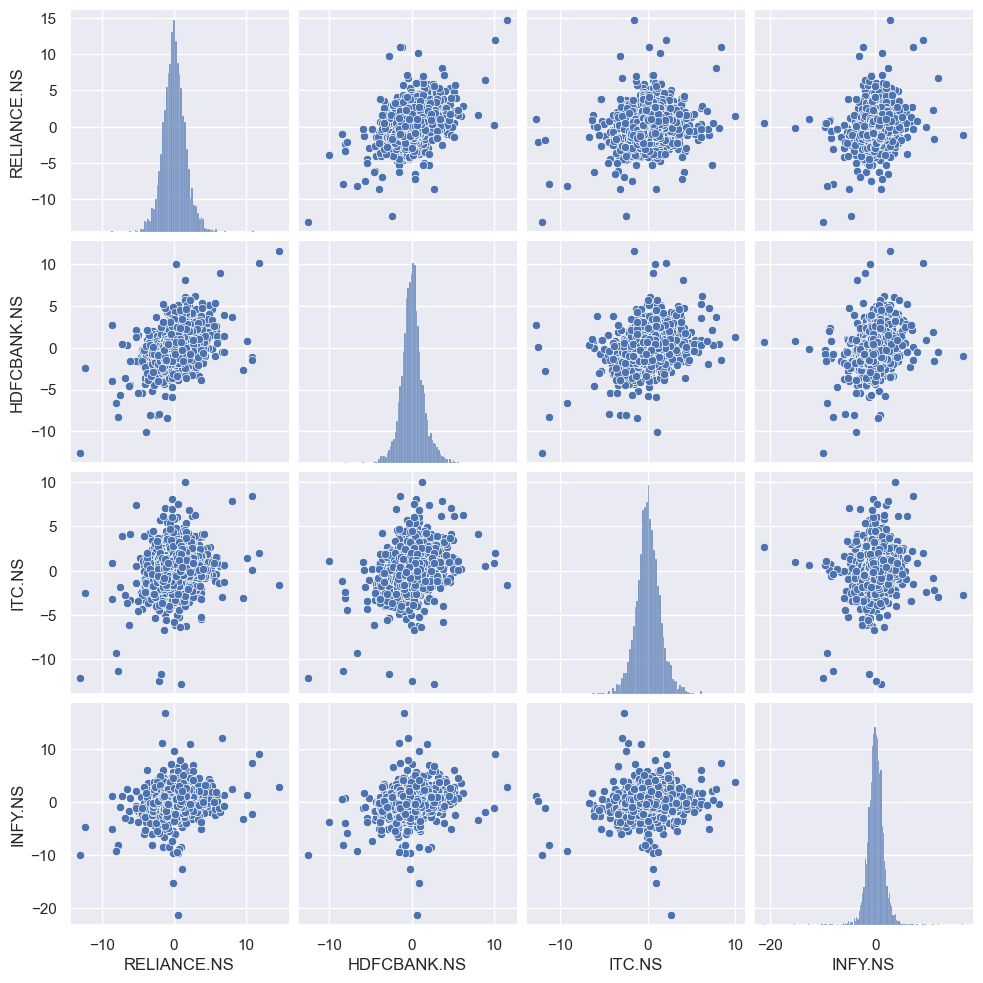

In [34]:
# Pairplot of returns dataframe 

sns.pairplot(returns);

### 7.2 Box plots

Box and whisker plots are a standardised way of displaying the distribution of data based on a five number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum), with a line going through the box at the median. 



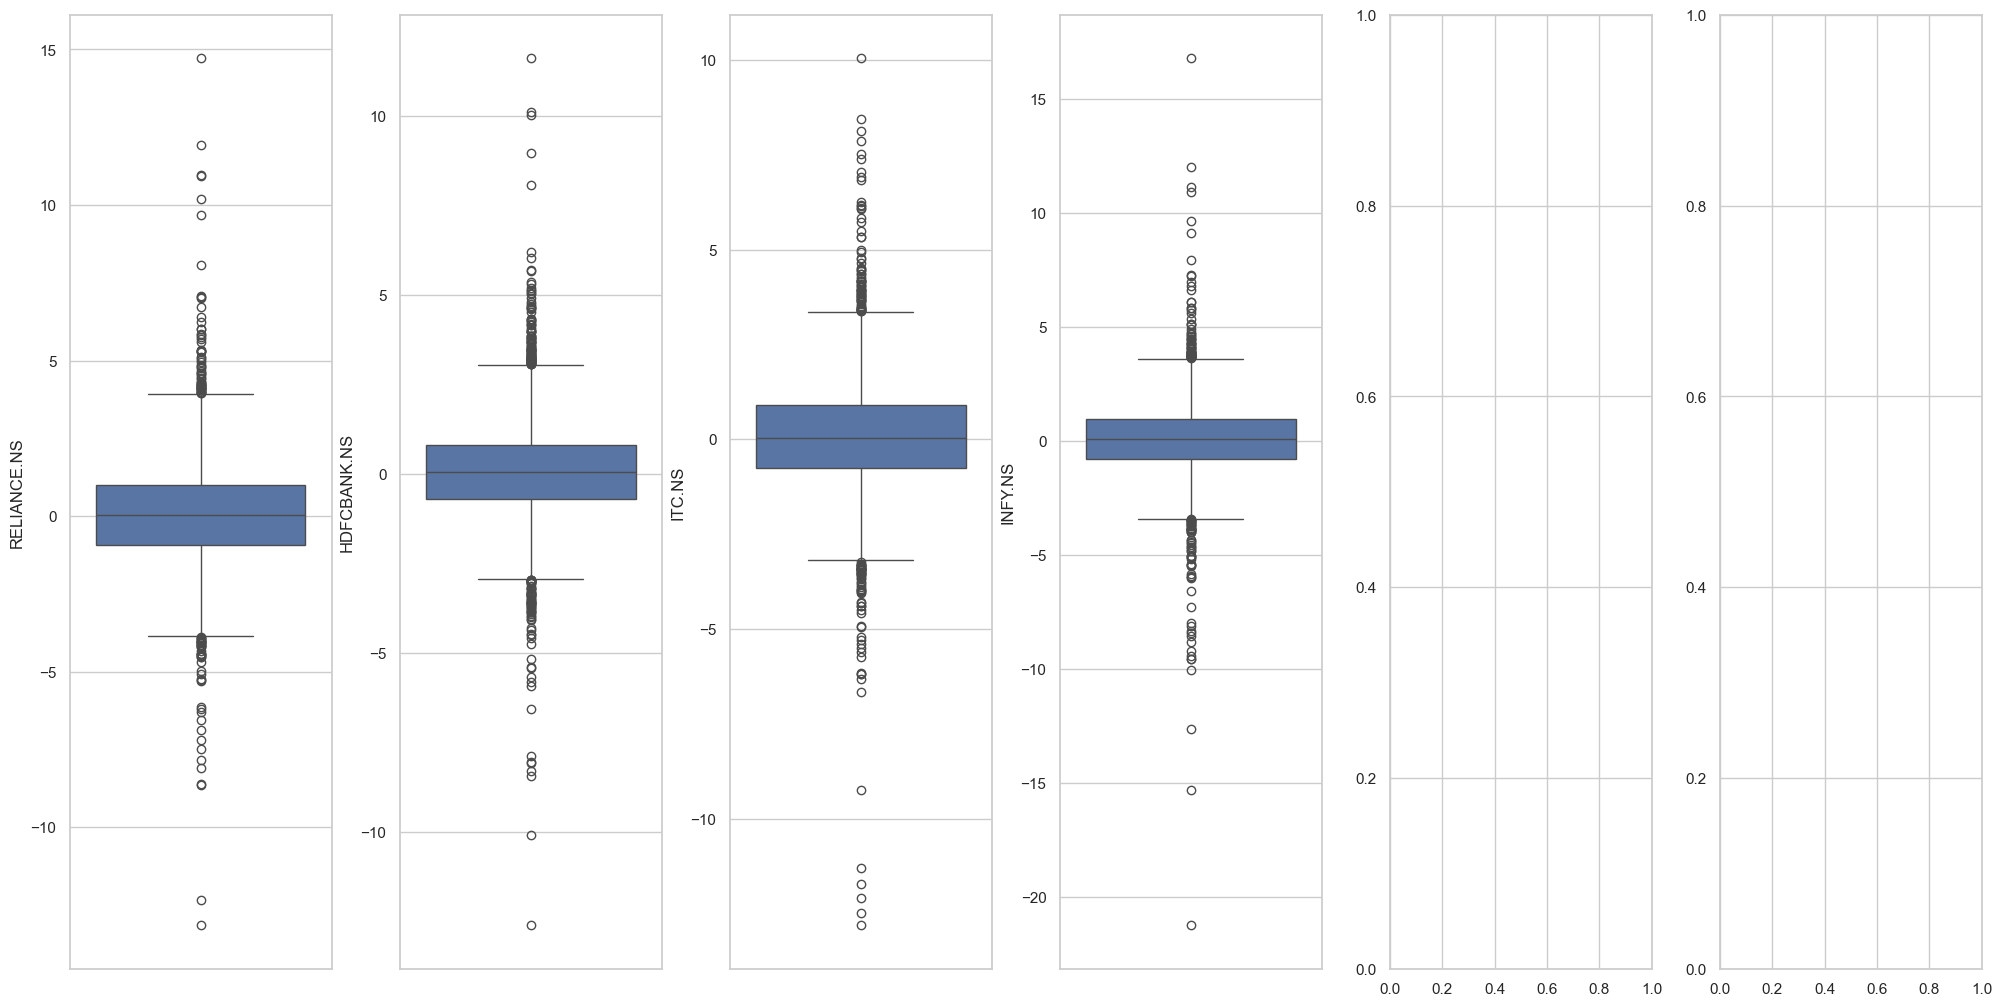

In [35]:
# Boxplots showing distribution of the returns data over the time period 

sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in returns.items():
    sns.boxplot(y=k, data=returns, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

By comparing the interquartile ranges (box lengths), we can compare dispersion. If two boxes do not overlap with one another then there is a difference between the two groups. We can see that AZN.L and ULVR. do not overlap with the other stocks.

If we compare the respective medians and the median line of one box lies outside of another entirely, then there is likely to be a difference between the two groups. Again we can see that AZN.L and ULVR. are different.

Whiskers show how big a range there is between maximum and minimum values, with larger ranges indicating wider distribution, that is, more scattered data.

We can look for signs of skewness suggesting that data may not be normally distributed. Skewed data show a lopsided box plot, where the median cuts the box into two unequal pieces. If the longer part of the box is above the median, the data is said to be positively skewed. If the longer part is or below the median, the data is negatively skewed.

Any values in the data set that are more extreme than the adjacent values are plotted as separate points on the box plot. This identifies them as potential outliers.


### 7.3 Distribution plots

Distribution plots depict the variation in the data distribution. Here the distribution of returns is shown by a histogram and a line in combination with it which is the kernel density estimate.

C:\Users\Vishwa Doshi\AppData\Local\Temp\ipykernel_25704\1094192090.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2019-01-01':'2019-12-31'][ticker], color='green', bins=100, ax=axs[index])
C:\Users\Vishwa Doshi\AppData\Local\Temp\ipykernel_25704\1094192090.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

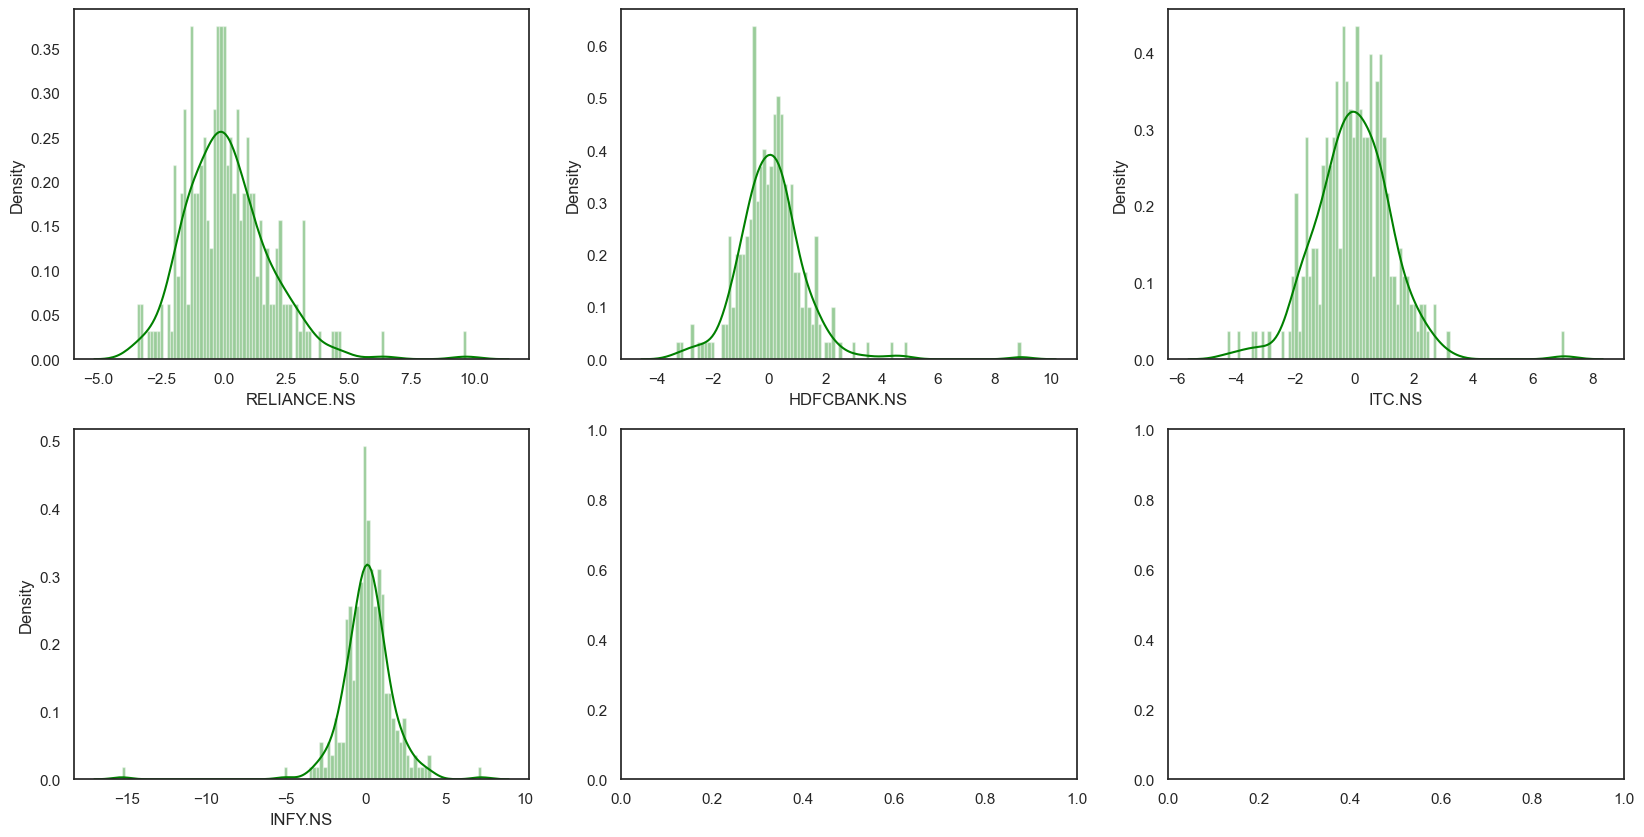

In [38]:
# Distribution plots showing the data for returns for 2019 

sns.set_style("white")
tickers = ['RELIANCE.NS', 'HDFCBANK.NS', 'ITC.NS', 'INFY.NS']
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for ticker in tickers:
    sns.distplot(returns.loc['2019-01-01':'2019-12-31'][ticker], color='green', bins=100, ax=axs[index])
    index += 1

In [41]:
# Covariance matrix to show direction of relationship between stocks' returns

returns.cov() 

,RELIANCE.NS,HDFCBANK.NS,ITC.NS,INFY.NS
RELIANCE.NS,3.029483,1.072220,0.657548,0.712925
HDFCBANK.NS,1.072220,2.172578,0.698652,0.649153
ITC.NS,0.657548,0.698652,2.424792,0.399666
INFY.NS,0.712925,0.649153,0.399666,2.946038


### 7.5 Correlation

Correlation measures both the **strength and direction** of the linear relationship between two variables, or the degree to which two variables move in relation to each other, and is a function of the covariance.

In [42]:
# Correlation matrix to show strength and direction of relationship between stocks' returns

returns.corr()



,RELIANCE.NS,HDFCBANK.NS,ITC.NS,INFY.NS
RELIANCE.NS,1.000000,0.417938,0.242609,0.238639
HDFCBANK.NS,0.417938,1.000000,0.304394,0.256590
ITC.NS,0.242609,0.304394,1.000000,0.149534
INFY.NS,0.238639,0.256590,0.149534,1.000000


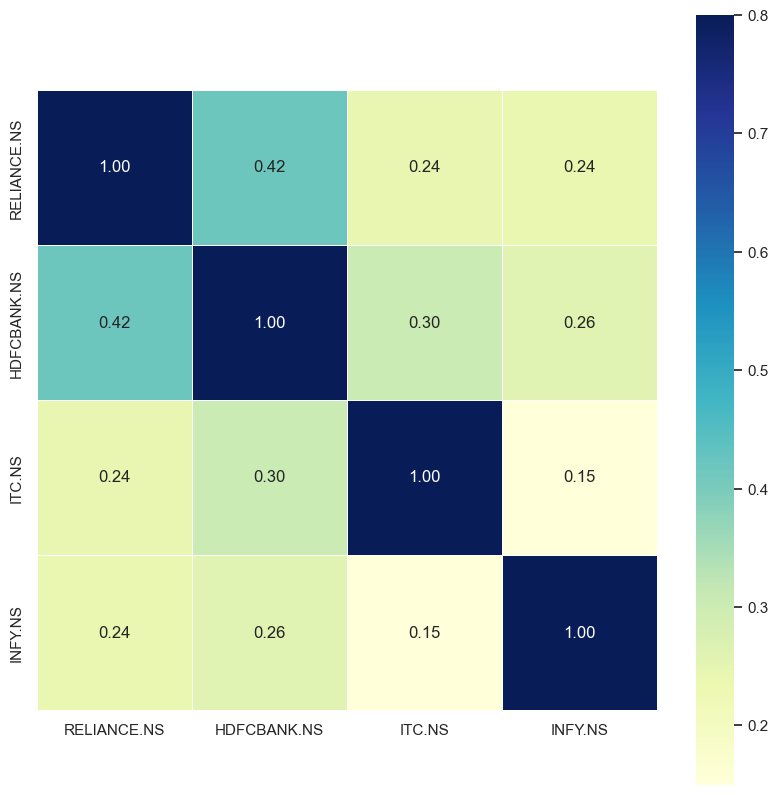

In [43]:
# The heatmap clearly shows the strength of correlation between pairs of company returns

plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

The strongest correlation is between RDSB and BP (oil stocks) followed by GSK and AZN (pharmaceutical stocks).

## 8. FTSE 100 Index data

Finally, we will visualise data from the launch of the FTSE 100 Index in January 1984 to the end of 2020 as being representative of the UK stock market.  


In [39]:
# Download FTSE 100 historical stock data from Yahoo! Finance for 1984-2020

nifty100_idx_to_2024 = yf.download("^NSEI", start=datetime.datetime(2007, 1, 1), 
                                     end=datetime.datetime(2024, 6, 30))
nifty100_idx_to_2024

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2024-06-24,23382.300781,23558.099609,23350.000000,23537.849609,23537.849609,239400
2024-06-25,23577.099609,23754.150391,23562.050781,23721.300781,23721.300781,298100
2024-06-26,23723.099609,23889.900391,23670.449219,23868.800781,23868.800781,287800


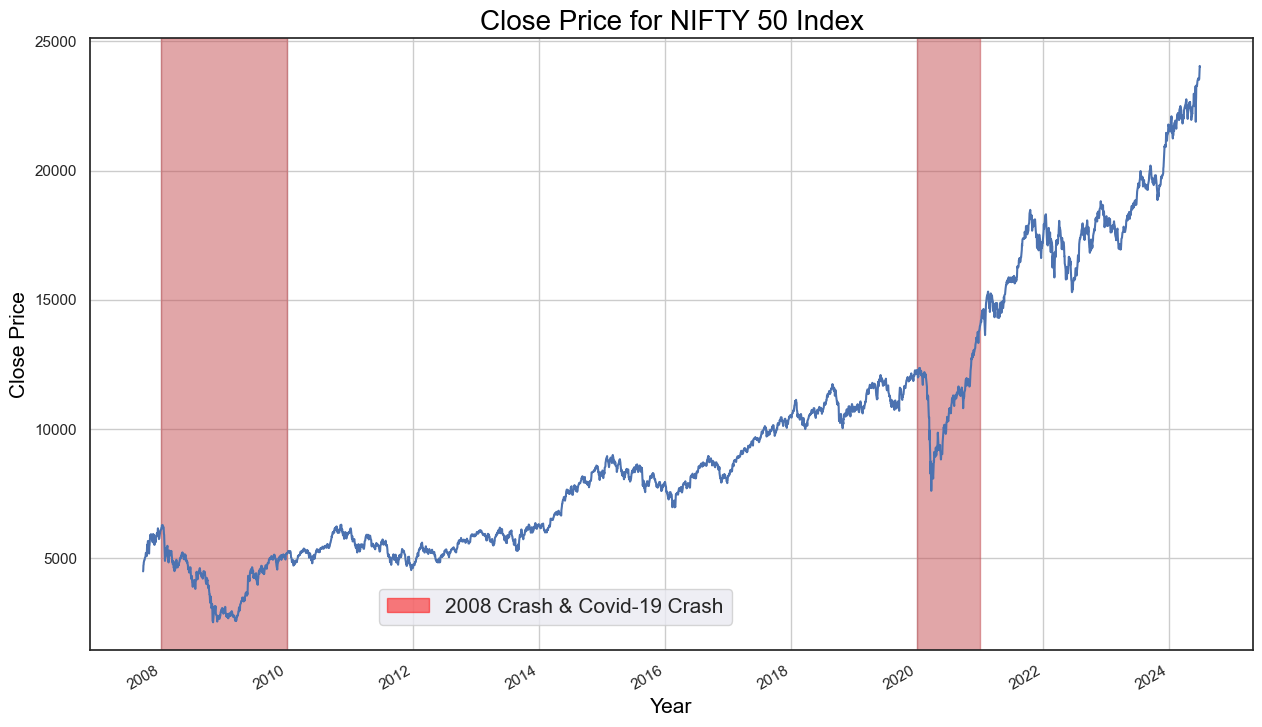

In [40]:
def nifty100_idx_to_2024_plot():
    nifty100_idx_to_2024['Close'].plot(grid = True)
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.axvspan('2008','2010',color='r',alpha=.5)
    plt.axvspan('2020','2021',color='r',alpha=.5)
    labs = mpatches.Patch(color='red',alpha=.5, label="2008 Crash & Covid-19 Crash")
    plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.1), loc='upper center', borderaxespad=0.)
    plt.title('Close Price for NIFTY 50 Index', color = 'black', fontsize = 20)
    plt.xlabel('Year', color = 'black', fontsize = 15)
    plt.ylabel('Close Price', color = 'black', fontsize = 15)
    plt.show();

nifty100_idx_to_2024_plot()

The plot clearly shows the major market events of Black Monday in 1987, the 2008 Global Financial Crisis, and the Coronavirus Crash in 2020 and appears to confirm the overall upward trend of stocks from 2010-2019 evident in the selection of stocks analysed.